# P2

(array([0.40266667, 0.34633333, 0.        , 0.24433333, 0.        ,
        0.29433333, 0.244     , 0.        , 0.104     , 0.031     ]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

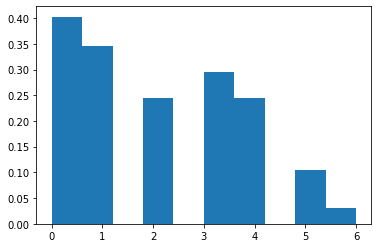

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

def euclideanDistance(x,y):
    return np.linalg.norm(x-y)

def getDistance(data,n):
    v = np.repeat(0,n)

    for i in range(n):
        ind = np.random.randint(len(data),size=2)
        p = data.iloc[ind[0],:]
        q = data.iloc[ind[1],:]
        v[i] = euclideanDistance(p,q)
    return v

d = getDistance(iris.iloc[:,:4],5000)
plt.hist(d,density=True,bins=10)


# P3

In [5]:
import face_recognition
from rtree import index

def build_tree(file,q):
    img = face_recognition.load_image_file(file)
    unknown_face_encodings = face_recognition.face_encodings(img)
    
    p = index.Property()
    p.dimension = 2
    p.buffering_capacity = 3
    p.dat_extension = 'data'
    p.idx_extension = 'index'
    idx = index.Index('2d_index',properties=p)

    if len(unknown_face_encodings) > 0:
        for i in range(len(unknown_face_encodings)):
            idx.insert(i,(i,i,i,i))
    lres = list(idx.nearest(coordinates=q,num_results=1))

    return lres

file = open('/mnt/c/Users/Sebastian/C_2021-2/BD2/Laboratory/Lab_10.2/Laboratorio10_BD2/foto.jpg','rb')
build_tree(file,(3,6))

[0, 0, 0]